# US Accident Exploratory Data Analysis

## Data Preparation and Cleaning

#### Download Data

In [1]:
#installing 'opendatasets' package. It is a Python library for downloading datasets from online sources like Kaggle
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets

#adding the link of data source from kaggle
source_url= "https://www.kaggle.com/sobhanmoosavi/us-accidents"

#downloading dataset. user_id and API key is available at 'yourKaggleProfile'>AccountSetting>API>CreateNewAPItoken
opendatasets.download(source_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shitabtanzim
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:02<00:00, 41.4MB/s]


In [7]:
#adding the file path by referring to the files section
filename= "./us-accidents/US_Accidents_Dec20_updated.csv" 

#### Load Data

In [8]:
import pandas as pd

In [9]:
#importing the data file as a pandas dataframe
df= pd.read_csv(filename)

#### Basic informations about the data

In [43]:
#printing no. of rows and no. of columns present in the dataset
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}')

Number of rows: 1516064
Number of columns: 46


In [49]:
#showing column names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [41]:
#showing some basics statistical detail of the numerical columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


#### Removing missing values

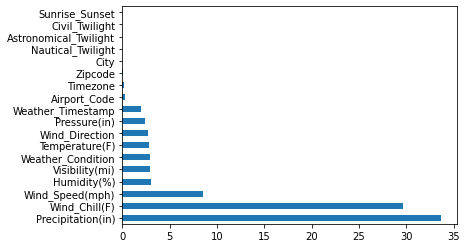

In [23]:
#calculating the percentage of missing values per column
missing_percentages= df.isna().sum().sort_values(ascending=False) / len(df) *100

#plotting to be columns with missing value
missing_percentages[missing_percentages!=0].plot(kind='barh')

// Since the columns where more than 50% of the data is missing are not useful, we can delete them.

In [22]:
#dropping number column as a lot of data in this column is missing
df= df.drop('Number', axis=1)

#### Validate datatype

In [ ]:
#printing each column name, it's first value, and it's datatype
for c in df.columns:
  print(c, df[c][0], type(df[c][0]), sep="\t")

// It's better to convert Start_Time and End_Time to datetime from str.

In [36]:
#converting Start_Time and Date_Time from str to datetime
df['Start_Time']= pd.to_datetime(df.Start_Time)
df['End_Time']= pd.to_datetime(df.End_Time)

## Exploratory Analysis and Data Visualisation

Column we'll analyze
- City
- Start Time
- Start Lat, Start Long
- Temperature
- Weather condition

### City

In [ ]:
len(df.City.unique())

10658

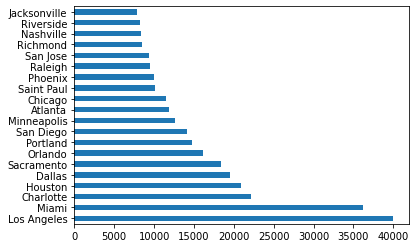

In [ ]:
cities_by_accident= df.City.value_counts()
cities_by_accident[:20].plot(kind="barh")

In [ ]:
'New York' in df.City

False

In [ ]:
'NY' in df.State

False

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


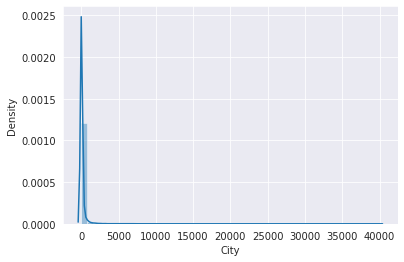

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities= cities_by_accident[cities_by_accident > 1000]
low_accident_cities= cities_by_accident[cities_by_accident <= 1000]
print(len(high_accident_cities))
print(len(low_accident_cities))

251
10406


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


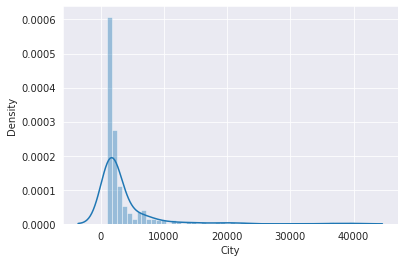

In [ ]:
sns.distplot(high_accident_cities)

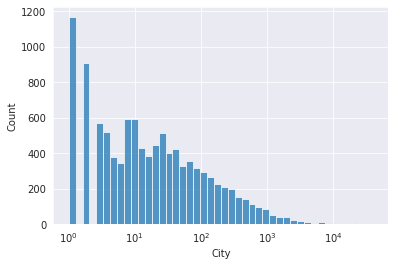

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Southwest Ranches    1
Horse Shoe           1
Decker               1
Urbanna              1
West Charleston      1
                    ..
Shelburn             1
Centerview           1
West Newbury         1
Brierfield           1
Trimble              1
Name: City, Length: 1167, dtype: int64

### Start_Time

In [ ]:
df.Start_Time= pd.to_datetime(df.Start_Time)

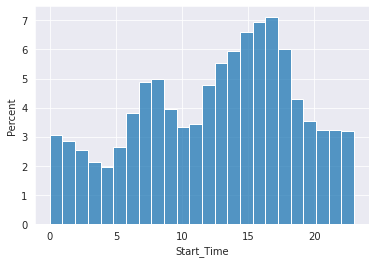

In [ ]:
sns.histplot(df.Start_Time.dt.hour, stat='percent', bins=24)

- A high percentage of accident occur between 3pm to 6pm ( probably people tired after work, or faded sunlight (dusk), or both)
- Next highest point is 7-9

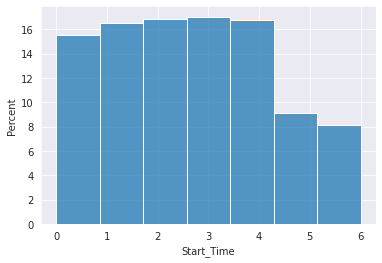

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, stat='percent', bins=7)

- On weekend number of accident is less
- QQQ- Is the distribution of accident by hour is the same on weekend

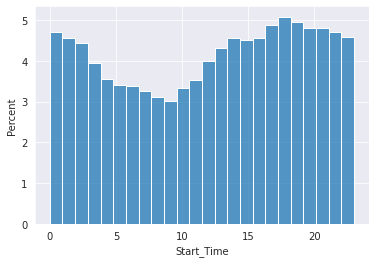

In [ ]:
sunday_start_time= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday_start_time.dt.hour, stat='percent', bins=24)

On Sundays the peak occur between 5pm and 8pm

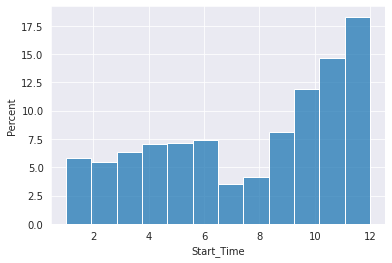

In [ ]:
sns.histplot(df.Start_Time.dt.month, stat='percent', bins=12)

-- Find out why the skewness is occuring

-- Much data is missing in some year

### Lat and Long

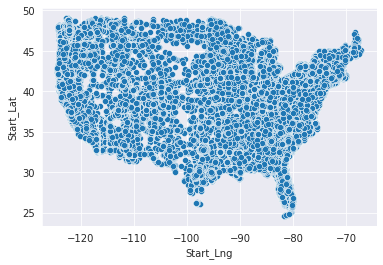

In [ ]:
sns.scatterplot(x=df.Start_Lng, y= df.Start_Lat )

In [ ]:
import folium

In [ ]:
lat, lng = df.Start_Lat[0], df.Start_Lng[0]

In [ ]:
df_sample= df.sample(100)


In [ ]:
map= folium.Map()
for lat,lng in zip(df_sample.Start_Lat, df_sample.Start_Lng):
  marker= folium.Marker((lat,lng))
  marker.add_to(map)
map

## Ask and Answer Questions

1. Are the more accidents in warmer or colder areas?
2. Which states has the highest number of accidents? Check per capita
3. Why doesn't NY shows in the data? if yes why is doesn't have many accidents
5. What time of the day accident are frequent?
6. Which days or the weeek have most accidents?
7. Which month have most accident?
8. What is the year by year trend?
9. When is accident per unit traffic is highest

## Summary and Conclusion

Insights:
1. Not data for NY
2. Less than 5% cities have more than 1000 yearly accidents
3. No. of accident per city decreases/increases exponentially
4. Over 12,000 cities reported 1 accident. !Need to investigate